# ОПИСАНИЕ ПРОЕКТА
Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
# ЗАДАЧА: 
Cделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучим общую информацию



In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt # импортирую библиотеку matplotlib.pyplot
import seaborn as sns

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv')# записываем базу данных по звонкам в переменную df_calls 
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [3]:
df_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


В df_calls пропущенных значений нет

In [4]:
df_internet = pd.read_csv('/datasets/internet.csv', index_col = 0)# записываем данные по интернету в переменную df_internet 
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [5]:
df_internet.head(10)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


In [6]:
df_internet['mb_used'].max()

1724.83

В df_internet пропущенных значений тоже нет

In [7]:
df_messages = pd.read_csv('/datasets/messages.csv')# записываем данные по сообщениям в переменную df_messages 
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
df_messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


В df_messages пропущенных значений тоже нет

In [9]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')# записываем базу данных по тарифам в переменную df_tariffs 
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [10]:
df_tariffs.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В df_tariffs сразу видно что пропусков нет

In [11]:
df_users = pd.read_csv('/datasets/users.csv')# записываем базу данных по пользователям в переменную df_users 
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
df_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [13]:
df_users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

В df_users в столбце churn_date 462 пропуска, но в описании сказано, что если значение пропущено, то тариф ещё действовал на момент выгрузки данных. При необходимости можно заменить на 0

**Вывод:**
Есть проблемы в данных. Надо менять типы данных в датах. Вещественный тип в звонках, потреблении интернета и кл-ве смс переведем в целочисленный. Присутствуют пропуски в churn_date. Есть смысл их просто поменять на 0(значит смены оператора не было). В соответствии требования оператора округлить длительность звонка и потребление интернета до целочисленных. А также во всех столбацх где есть дата нужно заменить тип данных на date_time

## Предобработка данных

Начинаю с дат

In [14]:
df_calls['call_date']=pd.to_datetime(df_calls['call_date'],format='%Y-%m-%d')

In [15]:
df_messages['message_date']=pd.to_datetime(df_messages['message_date'],format='%Y-%m-%d %H:%M:%S')

In [16]:
df_internet['session_date']=pd.to_datetime(df_internet['session_date'],format='%Y-%m-%d')

In [17]:
df_users['churn_date']=pd.to_datetime(df_users['churn_date'],format='%Y-%m-%d')

In [18]:
df_users['reg_date']=pd.to_datetime(df_users['reg_date'],format='%Y-%m-%d')

Теперь с числами

In [19]:
df_internet['mb_used']=np.ceil(df_internet['mb_used'].astype('int64'))# округляю количество интеренета в мегабайтах в большую сторону

In [21]:
df_calls['duration']=np.ceil(df_calls['duration'])# округляю длительность звонков в большую сторону

## Первоначальный расчеты

Начнем с количества сделанных звонков и израсходованных минут разговора по месяцам

In [22]:
df_calls['month']=df_calls['call_date'].dt.month

In [23]:
group_calls=df_calls.pivot_table(index=['month','user_id'],values='duration',aggfunc=('sum'))
group_calls # Сделал сводную таблицу по звонкам и месяцам

duration
month user_id          
1     1005         95.0
      1032        380.0
      1045          9.0
      1055        551.0
      1071        194.0
...                 ...
12    1494        418.0
      1495       1031.0
      1496        518.0
      1497        545.0
      1499        492.0

[3174 rows x 1 columns]

Теперь сделаем тоже самое с количеством отправленных сообщений по месяцам

In [24]:
df_messages['month']=df_messages['message_date'].dt.month

In [25]:
group_messages=df_messages.pivot_table(index=['month','user_id'],values='message_date',aggfunc=('count'))
group_messages

message_date
month user_id              
1     1005                7
      1032               38
      1045                5
      1055               30
      1071               16
...                     ...
12    1493               78
      1495               84
      1496               51
      1497               17
      1499               66

[2717 rows x 1 columns]

Теперь сделаем тоже самое с объемом израсходованного интернет-трафика по месяцам

In [26]:
df_internet['month']=df_internet['session_date'].dt.month

In [27]:
group_internet=df_internet.pivot_table(index=['month','user_id'],values='mb_used',aggfunc=('sum'))
group_internet

mb_used
month user_id         
1     1005      2724.0
      1032     24100.0
      1045      2343.0
      1055     17069.0
      1071     15585.0
...                ...
12    1494     17601.0
      1495     23404.0
      1496     20702.0
      1497     19899.0
      1499     13037.0

[3203 rows x 1 columns]

Теперь объеденим их все в одну для удобства

In [28]:
group_messages_call=group_messages.merge(group_calls,on=['user_id','month'],how='outer') # объединяю таблицу звонки и сообщения 

In [29]:
group_messages_call

,,message_date,duration
user_id,month,,
1005,1,7.0,95.0
1032,1,38.0,380.0
1045,1,5.0,9.0
1055,1,30.0,551.0
1071,1,16.0,194.0
...,...,...,...
1462,12,NaN,878.0
1466,12,NaN,659.0
1469,12,NaN,635.0


In [30]:
group_all=group_messages_call.merge(group_internet,on=['user_id','month'],how='outer')

In [31]:
group_all

,,message_date,duration,mb_used
user_id,month,,,
1005,1,7.0,95.0,2724.0
1032,1,38.0,380.0,24100.0
1045,1,5.0,9.0,2343.0
1055,1,30.0,551.0,17069.0
1071,1,16.0,194.0,15585.0
...,...,...,...,...
1466,12,NaN,659.0,14613.0
1469,12,NaN,635.0,27736.0
1479,12,NaN,576.0,23397.0


In [32]:
df_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaT,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaT,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaT,Пермь,Василиса,Блинова,2018-03-22,smart


Также добавим в общую таблицу информацию о пользователях

In [33]:
df_users.reset_index()

,index,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...,...
495,495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart
498,498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [34]:
# Вот
group_all.shape

(3214, 3)

In [35]:
group_all = group_all.merge(df_users,on = ['user_id'], how = 'inner')
group_all.tail()

,user_id,message_date,duration,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
3209,1095,NaN,540.0,18387.0,70,NaT,Новосибирск,Марианна,Кабанова,2018-12-23,smart
3210,1117,NaN,282.0,11974.0,42,NaT,Тюмень,Дана,Меркулова,2018-12-10,smart
3211,1129,NaN,452.0,16422.0,48,NaT,Курган,Анвар,Морозов,2018-12-17,smart
3212,1297,NaN,404.0,18963.0,66,NaT,Иркутск,Радим,Абрамцев,2018-12-04,smart
3213,1397,NaN,232.0,23509.0,47,NaT,Воронеж,Инна,Чистякова,2018-12-22,ultra


In [36]:
group_all.shape

(3214, 11)

In [37]:
group_all=group_all.fillna(0).sort_values(by='user_id')#  меняю nan на 0

In [38]:
del group_all['age']
del group_all['churn_date']
del group_all['first_name']
del group_all['last_name']
del group_all['reg_date']

In [39]:
group_all.head() # Рабочая таблица

,user_id,message_date,duration,mb_used,city,tariff
1417,1000,57.0,466.0,14556.0,Краснодар,ultra
1420,1000,70.0,333.0,9808.0,Краснодар,ultra
1419,1000,58.0,338.0,14745.0,Краснодар,ultra
1418,1000,73.0,350.0,14690.0,Краснодар,ultra
1416,1000,81.0,408.0,14043.0,Краснодар,ultra


Далее посчитаем выручку с каждого пользователя

In [40]:
#Функция посчета выручки в зависимости от тарифа
def user_money(row):
    
    messages = row['message_date']
    calls = row['duration']
    internet = row['mb_used']
    tariff = row['tariff']
    
    
    if (tariff == 'smart'):
        i = 0
    else:
        i = 1
        
    ostatok_call = df_tariffs['minutes_included'][i] - calls
    if ostatok_call < 0:
        call_money = -ostatok_call * df_tariffs['rub_per_minute'][i]
    else:
        call_money = 0
         
    ostatok_internet=df_tariffs['mb_per_month_included'][i]-internet
    if ostatok_internet < 0:
        internet_money = np.ceil((-ostatok_internet/1024)) * df_tariffs['rub_per_gb'][i]
    else:
        internet_money = 0
            
    ostatok_messages = df_tariffs['messages_included'][i] - messages
    if ostatok_messages < 0:
        messages_money = - ostatok_messages * df_tariffs['rub_per_message'][i]
    else:
        messages_money = 0
            
    money = call_money + internet_money + messages_money + df_tariffs['rub_monthly_fee'][i]
    return money     

In [41]:
group_all['money']=group_all.apply(user_money,axis=1)

In [42]:
group_all.head()

,user_id,message_date,duration,mb_used,city,tariff,money
1417,1000,57.0,466.0,14556.0,Краснодар,ultra,1950.0
1420,1000,70.0,333.0,9808.0,Краснодар,ultra,1950.0
1419,1000,58.0,338.0,14745.0,Краснодар,ultra,1950.0
1418,1000,73.0,350.0,14690.0,Краснодар,ultra,1950.0
1416,1000,81.0,408.0,14043.0,Краснодар,ultra,1950.0


In [43]:
group_all['money'].unique()

array([1950., 1150.,  550., 1350.,  950., 1550.,  886., 1219.,  556.,
        949.,  775.,  835., 1186.,  838.,  694.,  750.,  990.,  685.,
        981., 1750., 1015.,  568., 2550., 2350., 2150., 2553., 1540.,
       1356., 1795., 3350., 2750., 2559., 1953., 3150., 1838., 3004.,
       1004., 1235., 3040., 1019., 1622., 1783., 1672.,  986., 3321.,
       2850., 3900.,  592.,  739., 1009.,  959.,  781., 1906.,  655.,
       1064., 2919., 1998., 2313., 1723., 1087.,  703.,  691.,  679.,
        673., 1473.,  718.,  676.,  736., 1045., 1171., 1013., 2031.,
       2616., 2831., 1640., 1816., 1697.,  553.,  562.,  589., 1359.,
        840., 1112., 1057., 3233., 5709., 2950., 1661., 2186., 2213.,
        756., 2189.,  971.,  995., 1965.,  574.,  762., 1885., 2115.,
       3985., 3584., 2700.,  601., 2788., 1751., 2130., 2264., 1765.,
       2219., 1248., 1671., 1074., 1612., 1488., 1476., 1711., 1154.,
       2441., 1103., 2004.,  924., 1553., 2210., 1321., 2028., 1948.,
       2813., 1131.,

## Проанализируем данные

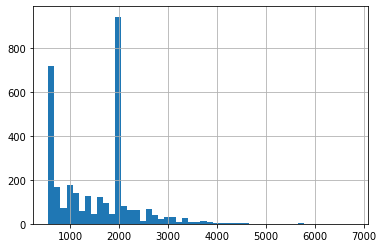

In [44]:
group_all['money'].hist(bins=50)

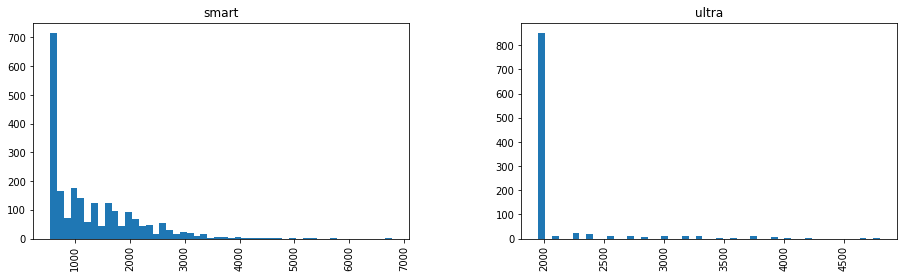

In [45]:
group_all.hist(bins=50, by='tariff', column='money', figsize=(15,4))

plt.show()

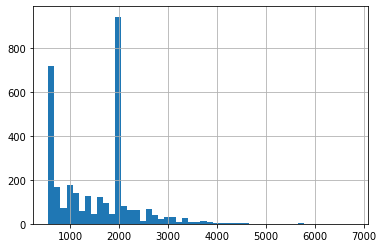

In [46]:
group_all['money'].hist(bins=50)

In [47]:
group_all.groupby('tariff')['money'].sum()

tariff
smart    2867751.0
ultra    2038500.0
Name: money, dtype: float64

In [48]:
group_all.query('tariff=="ultra" and money>1950')

,user_id,message_date,duration,mb_used,city,tariff,money
3181,1024,0.0,949.0,35913.0,Санкт-Петербург,ultra,2850.0
3180,1024,0.0,1146.0,43069.0,Санкт-Петербург,ultra,3900.0
1733,1050,52.0,209.0,35139.0,Тюмень,ultra,2700.0
2649,1060,52.0,1233.0,43893.0,Калуга,ultra,3900.0
2418,1124,121.0,1225.0,49701.0,Махачкала,ultra,4800.0
...,...,...,...,...,...,...,...
3117,1469,0.0,795.0,35463.0,Сочи,ultra,2700.0
2703,1474,105.0,1345.0,42285.0,Набережные Челны,ultra,3750.0
2707,1493,78.0,571.0,42700.0,Красноярск,ultra,3750.0
2403,1495,79.0,954.0,38903.0,Иркутск,ultra,3150.0


In [49]:
group_all.query('tariff=="smart" and money>550').count()

user_id         1659
message_date    1659
duration        1659
mb_used         1659
city            1659
tariff          1659
money           1659
dtype: int64

Из графика и сгруппированной таблицы видно, что тариф ультра прибыльнее чем смарт. 

In [50]:
count_durations=group_all.pivot_table(index='user_id',values='duration',aggfunc=('count'))

Подсчет количества звонков

In [51]:
tariff_ultra=(group_all
     .query('tariff=="ultra"')
     .pivot_table(index='user_id',values=('duration','message_date','mb_used'),aggfunc=('sum'))
     #.plot(y='mb_used',grid=True,figsize=(13,6),style='o-',kind='bar',label='ultra')
)

tariff_smart=(group_all
     .query('tariff=="smart"')
     .pivot_table(index='user_id',values=('duration','message_date','mb_used'),aggfunc=('sum'))
                                                                                      
)

отделяю тариф Ультра и тариф Смарт по отдельности с подсчетом сумм по звокам, интернету и сообщениям

In [52]:
tariff_ultra

,duration,mb_used,message_date
user_id,,,
1000,2566.0,107295.0,496.0
1003,3822.0,57227.0,380.0
1004,987.0,148897.0,1192.0
1013,936.0,30490.0,42.0
1016,122.0,26788.0,142.0
...,...,...,...
1476,4204.0,150140.0,45.0
1485,584.0,23401.0,155.0
1491,4620.0,161308.0,432.0


In [53]:
tariff_smart

,duration,mb_used,message_date
user_id,,,
1001,844.0,32423.0,0.0
1002,1517.0,115890.0,70.0
1005,6605.0,99562.0,552.0
1006,3501.0,163991.0,0.0
1007,4379.0,131445.0,225.0
...,...,...,...
1494,1946.0,76895.0,0.0
1496,5984.0,270579.0,468.0
1497,1406.0,45522.0,51.0


Сделал срез по месяцам и посчитал сумму потраченных минут, сообщенийб интернета для каждого тарифа

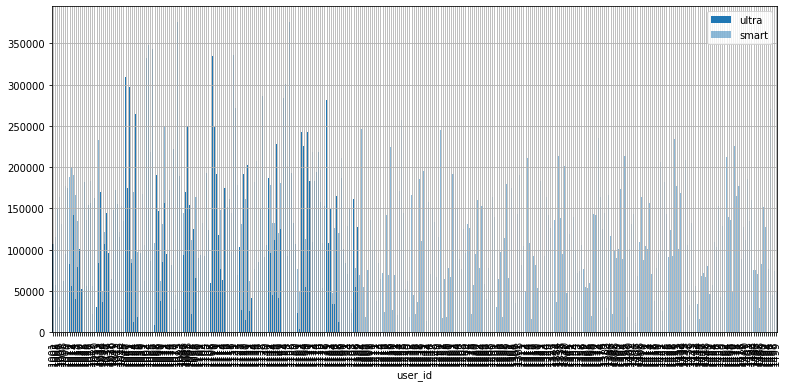

In [54]:
ax=tariff_ultra.plot(y='mb_used',figsize=(13,6),style='o-',kind='bar',label='ultra')
#plt.show()
tariff_smart.plot(y='mb_used',grid=True,figsize=(13,6),style='o-',kind='bar',label='smart',alpha=0.5,ax=ax)

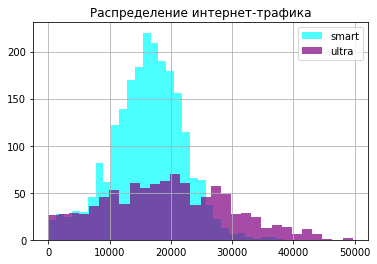

In [55]:
group_all[group_all['tariff'] == 'smart']['mb_used'].hist(bins=30, color='aqua', alpha=0.7, label='smart')
group_all[group_all['tariff'] == 'ultra']['mb_used'].hist(bins=30, color='purple', alpha=0.7, label='ultra')

plt.title('Распределение интернет-трафика')
plt.legend()
plt.show()

График количества потраxенного интернета по месяцам по двум тарифам. Видно, что Смарт лидируеn.

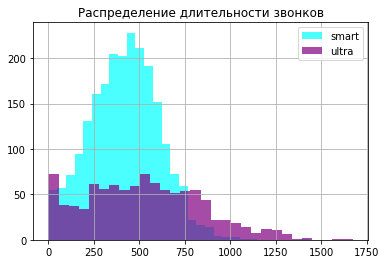

In [56]:
group_all[group_all['tariff'] == 'smart']['duration'].hist(bins=30, color='aqua', alpha=0.7, label='smart')
group_all[group_all['tariff'] == 'ultra']['duration'].hist(bins=30, color='purple', alpha=0.7, label='ultra')

plt.title('Распределение длительности звонков')
plt.legend()
plt.show()

График количества минут разговора по месяцам и двум тарифам. И смарт также лидирует. 

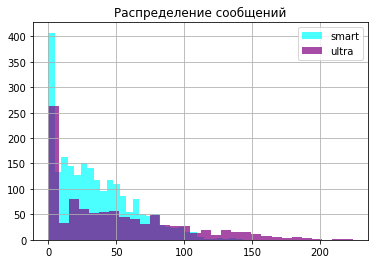

In [57]:
group_all[group_all['tariff'] == 'smart']['message_date'].hist(bins=30, color='aqua', alpha=0.7, label='smart')
group_all[group_all['tariff'] == 'ultra']['message_date'].hist(bins=30, color='purple', alpha=0.7, label='ultra')

plt.title('Распределение сообщений')
plt.legend()
plt.show()

График количества сообщений по месяцам. Тут ситуация по сути такая же, но тариф Ультра все таки немного показывает себя.

## Подсчет среднего количества, дисперсии и стандартного отклонения

In [58]:
mean_ultra=(group_all
     .query('tariff=="ultra"')
     .pivot_table(index='user_id',values=('duration','message_date','mb_used'),aggfunc=('mean'))    
)

Срез по месяцам для тарифа Ультра и расчета средних значений по звонкам, сообщениям, интернету

In [59]:
mean_ultra.set_axis(['mean_duration','mean_mb_used','mean_message'],axis='columns',inplace=True)
mean_ultra
#Среднее значение mean_duration mean_mb_used mean_message для тарифа Ультра.

,mean_duration,mean_mb_used,mean_message
user_id,,,
1000,320.750000,13411.875000,62.0
1003,764.400000,11445.400000,76.0
1004,123.375000,18612.125000,149.0
1013,468.000000,15245.000000,21.0
1016,61.000000,13394.000000,71.0
...,...,...,...
1476,467.111111,16682.222222,5.0
1485,584.000000,23401.000000,155.0
1491,513.333333,17923.111111,48.0


No handles with labels found to put in legend.


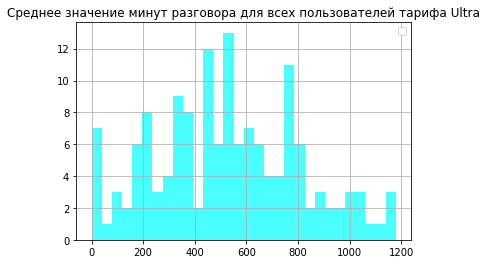

In [60]:
mean_ultra['mean_duration'].hist(bins=30, color='aqua', alpha=0.7)

plt.title('Среднее значение минут разговора для всех пользователей тарифа Ultra')
plt.legend()
plt.show()

In [61]:
mean_ultra['mean_minute_for_person']=tariff_ultra['duration']/len(group_all.query('tariff=="ultra"'))
#Считаю среднее время разговора пользователей за каждый месяц пользователей ультра

In [62]:
ultra_person_calls=group_all.query('tariff=="ultra"')# записываю в переменную всех пользователей Ультра для подсчета дисперсии 
ultra_person_calls.head()
#Считаю дисперсию и отклонение для тарифа Ultra по месяцам

,user_id,message_date,duration,mb_used,city,tariff,money
1417,1000,57.0,466.0,14556.0,Краснодар,ultra,1950.0
1420,1000,70.0,333.0,9808.0,Краснодар,ultra,1950.0
1419,1000,58.0,338.0,14745.0,Краснодар,ultra,1950.0
1418,1000,73.0,350.0,14690.0,Краснодар,ultra,1950.0
1416,1000,81.0,408.0,14043.0,Краснодар,ultra,1950.0


Далее посчитаю дисперсию по всем показателям Ultra

In [63]:
disp_sigma_ultra=ultra_person_calls.pivot_table(index='user_id',values='duration',aggfunc=(np.var))
#Считаю дисперсию звонков

disp_sigma_ultra_messages=ultra_person_calls.pivot_table(index='user_id',values='message_date',aggfunc=(np.var))
#Считаю дисперсию сообщений

disp_sigma_ultra_internet=ultra_person_calls.pivot_table(index='user_id',values='mb_used',aggfunc=(np.var))
#Считаю дисперсию интернет

Здесь я считаю стандартное отклонение по всем показателям Ultra

In [64]:
disp_sigma_ultra['sigma']=disp_sigma_ultra['duration'].apply(np.sqrt)
#Считаю стандартное отклонение по звонкам

disp_sigma_ultra_messages['sigma']=disp_sigma_ultra_messages['message_date'].apply(np.sqrt)
#Считаю стандартное отклонение по cообщениям

disp_sigma_ultra_internet['sigma']=disp_sigma_ultra_internet['mb_used'].apply(np.sqrt)
#Считаю стандартное отклонение по интернету

In [65]:
disp_sigma_ultra.set_axis(['dispersion_call','sigma_call'],axis='columns',inplace=True)
disp_sigma_ultra_messages.set_axis(['dispersion_message','sigma_message'],axis='columns',inplace=True)
disp_sigma_ultra_internet.set_axis(['dispersion_internet','sigma_internet'],axis='columns',inplace=True)
# Переименовываю столбцы

disp_sigma_ultra=disp_sigma_ultra.merge(disp_sigma_ultra_messages,on='user_id')
disp_sigma_ultra=disp_sigma_ultra.merge(disp_sigma_ultra_internet,on='user_id')
mean_ultra=mean_ultra.merge(disp_sigma_ultra,on='user_id')

Полная Таблица дисперсии и сигма (среднеквадратичное отклонение),средних для Ультра по месяцам

In [66]:
mean_ultra['mean_money']=group_all.query('tariff=="ultra"').pivot_table(index='user_id',values='money',aggfunc=('mean')) 
# Считаю среднее по прибыли

mean_ultra['dispersion_money']=group_all.query('tariff=="ultra"').pivot_table(index='user_id',values='money',aggfunc=(np.var))
# Считаю дисперсию по прибыли

mean_ultra['sigma_money']=np.sqrt(mean_ultra['dispersion_money']) 
# Считаю сигму по прибыли
mean_ultra.head(12)

,mean_duration,mean_mb_used,mean_message,mean_minute_for_person,dispersion_call,sigma_call,dispersion_message,sigma_message,dispersion_internet,sigma_internet,mean_money,dispersion_money,sigma_money
user_id,,,,,,,,,,,,,
1000,320.750000,13411.875000,62.000000,2.605076,11239.071429,106.014487,337.142857,18.361450,3.414898e+07,5843.712896,1950.0,0.0,0.000000
1003,764.400000,11445.400000,76.000000,3.880203,49897.300000,223.377036,530.000000,23.021729,5.525783e+06,2350.698471,1950.0,0.0,0.000000
1004,123.375000,18612.125000,149.000000,1.002030,1570.267857,39.626605,669.142857,25.867796,2.314864e+07,4811.303282,1950.0,0.0,0.000000
1013,468.000000,15245.000000,21.000000,0.950254,19602.000000,140.007143,32.000000,5.656854,5.988557e+07,7738.576613,1950.0,0.0,0.000000
1016,61.000000,13394.000000,71.000000,0.123858,2178.000000,46.669048,2048.000000,45.254834,7.245672e+07,8512.151432,1950.0,0.0,0.000000
1018,673.111111,6887.333333,26.000000,6.150254,22759.361111,150.862060,43.500000,6.595453,4.417844e+06,2101.866849,1950.0,0.0,0.000000
1019,352.166667,15897.833333,18.333333,2.145178,21612.566667,147.012131,34.266667,5.853774,9.123801e+07,9551.858844,1950.0,0.0,0.000000
1021,924.222222,19373.333333,89.000000,8.444670,104168.444444,322.751366,913.750000,30.228298,4.943461e+07,7030.975359,1950.0,0.0,0.000000
1024,724.666667,27429.666667,0.000000,2.207107,322366.333333,567.773135,0.000000,0.000000,4.492294e+08,21195.031713,2900.0,952500.0,975.961065


In [67]:
mean_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 1000 to 1495
Data columns (total 13 columns):
mean_duration             141 non-null float64
mean_mb_used              141 non-null float64
mean_message              141 non-null float64
mean_minute_for_person    141 non-null float64
dispersion_call           141 non-null float64
sigma_call                141 non-null float64
dispersion_message        141 non-null float64
sigma_message             141 non-null float64
dispersion_internet       141 non-null float64
sigma_internet            141 non-null float64
mean_money                141 non-null float64
dispersion_money          141 non-null float64
sigma_money               141 non-null float64
dtypes: float64(13)
memory usage: 15.4 KB


In [68]:
mean_smart=(group_all
     .query('tariff=="smart"')
     .pivot_table(index='user_id',values=('duration','message_date','mb_used'),aggfunc=('mean'))    
)

Cрез по месяцам для Смарт и расчета средних значений по звонка, сообщениям, интернету

Среднее значение mean_duration mean_mb_used mean_message для тарифа Smart.

In [69]:
mean_smart.set_axis(['mean_duration','mean_mb_used','mean_message'],axis='columns',inplace=True)
mean_smart
#Среднее значение mean_duration mean_mb_used mean_message для тарифа Смарт.

,mean_duration,mean_mb_used,mean_message
user_id,,,
1001,422.000000,16211.500000,0.0
1002,216.714286,16555.714286,10.0
1005,550.416667,8296.833333,46.0
1006,318.272727,14908.272727,0.0
1007,486.555556,14605.000000,25.0
...,...,...,...
1494,389.200000,15379.000000,0.0
1496,498.666667,22548.250000,39.0
1497,468.666667,15174.000000,17.0


No handles with labels found to put in legend.


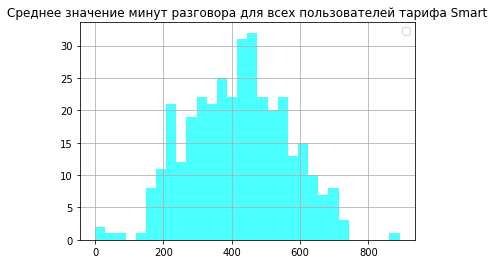

In [70]:
mean_smart['mean_duration'].hist(bins=30, color='aqua', alpha=0.7)

plt.title('Среднее значение минут разговора для всех пользователей тарифа Smart')
plt.legend()
plt.show()

Среднее время разговора для каждого месяца Смарт

In [71]:
mean_smart['mean_minute_for_person']=tariff_smart['duration']/len(group_all.query('tariff=="smart"'))
#Считаю среднее время разговора пользователей за каждый месяц пользователей смарт

In [72]:
smart_person_calls=group_all.query('tariff=="smart"')# записываю в переменную всех пользователей Смарт для подсчета дисперсии 
smart_person_calls.head()
#Считаю дисперсию и отклонение для тарифа Smart по месяцам

,user_id,message_date,duration,mb_used,city,tariff,money
3197,1001,0.0,430.0,18405.0,Москва,smart,1150.0
3198,1001,0.0,414.0,14018.0,Москва,smart,550.0
1723,1002,16.0,243.0,18566.0,Стерлитамак,smart,1350.0
1724,1002,12.0,236.0,18087.0,Стерлитамак,smart,1150.0
1721,1002,4.0,206.0,16669.0,Стерлитамак,smart,950.0


Cчитаю дисперсию и отклонение для тарифа Smart по месяцам

In [73]:
disp_sigma_smart=smart_person_calls.pivot_table(index='user_id',values='duration',aggfunc=(np.var))
#Считаю дисперсию звонков

disp_sigma_smart_messages=smart_person_calls.pivot_table(index='user_id',values='message_date',aggfunc=(np.var))
#Считаю дисперсию сообщений

disp_sigma_smart_internet=smart_person_calls.pivot_table(index='user_id',values='mb_used',aggfunc=(np.var))
#Считаю дисперсию интернет

Здесь я считаю стандартное отклонение по всем показателям Smart

In [74]:
disp_sigma_smart['sigma']=disp_sigma_smart['duration'].apply(np.sqrt)
#Считаю стандартное отклонение по звонкам

disp_sigma_smart_messages['sigma']=disp_sigma_smart_messages['message_date'].apply(np.sqrt)
#Считаю стандартное отклонение по cообщениям

disp_sigma_smart_internet['sigma']=disp_sigma_smart_internet['mb_used'].apply(np.sqrt)
#Считаю стандартное отклонение по интернету

In [75]:
disp_sigma_smart.set_axis(['dispersion_call','sigma_call'],axis='columns',inplace=True)
disp_sigma_smart_messages.set_axis(['dispersion_message','sigma_message'],axis='columns',inplace=True)
disp_sigma_smart_internet.set_axis(['dispersion_internet','sigma_internet'],axis='columns',inplace=True)
# Переименовываю столбцы

disp_sigma_smart=disp_sigma_smart.merge(disp_sigma_smart_messages,on='user_id')
disp_sigma_smart=disp_sigma_smart.merge(disp_sigma_smart_internet,on='user_id')
mean_smart=mean_smart.merge(disp_sigma_smart,on='user_id')

Полная Таблица дисперсии и сигма (среднеквадратичное отклонение),средних для Смарта по месяцам

In [76]:
mean_smart['mean_money']=group_all.query('tariff=="smart"').pivot_table(index='user_id',values='money',aggfunc=('mean')) 
# Считаю среднее по прибыли

mean_smart['dispersion_money']=group_all.query('tariff=="smart"').pivot_table(index='user_id',values='money',aggfunc=(np.var))
# Считаю дисперсию по прибыли

mean_smart['sigma_money']=np.sqrt(mean_smart['dispersion_money']) 
# Считаю сигму по прибыли
mean_smart.head(12)

,mean_duration,mean_mb_used,mean_message,mean_minute_for_person,dispersion_call,sigma_call,dispersion_message,sigma_message,dispersion_internet,sigma_internet,mean_money,dispersion_money,sigma_money
user_id,,,,,,,,,,,,,
1001,422.000000,16211.500000,0.0,0.378645,128.000000,11.313708,0.000000,0.000000,9.622884e+06,3102.077449,850.000000,180000.000000,424.264069
1002,216.714286,16555.714286,10.0,0.680574,2729.238095,52.242110,20.333333,4.509250,1.020805e+07,3195.004106,1035.714286,144761.904762,380.475892
1005,550.416667,8296.833333,46.0,2.963212,26633.901515,163.198963,207.272727,14.396969,5.946991e+06,2438.645370,827.000000,50169.818182,223.986201
1006,318.272727,14908.272727,0.0,1.570659,11980.218182,109.454183,0.000000,0.000000,2.825719e+07,5315.748773,931.818182,187636.363636,433.170132
1007,486.555556,14605.000000,25.0,1.964558,17198.277778,131.142204,62.500000,7.905694,1.290945e+07,3592.972585,913.444444,153123.027778,391.309376
1009,218.900000,17718.600000,11.0,0.982055,5021.655556,70.863641,16.222222,4.027682,2.751240e+07,5245.226681,1310.000000,584888.888889,764.780288
1010,231.000000,16713.200000,0.0,0.518170,7636.000000,87.384209,0.000000,0.000000,5.579348e+06,2362.064288,910.000000,168000.000000,409.878031
1011,432.800000,18786.200000,11.0,1.941678,13951.066667,118.114634,17.333333,4.163332,2.709081e+07,5204.882895,1514.400000,365677.377778,604.712641
1012,251.600000,20004.900000,15.0,1.128757,14870.711111,121.945525,45.333333,6.733003,5.818203e+07,7627.714562,1810.000000,898222.222222,947.745864


In [77]:
mean_smart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323 entries, 1001 to 1499
Data columns (total 13 columns):
mean_duration             323 non-null float64
mean_mb_used              323 non-null float64
mean_message              323 non-null float64
mean_minute_for_person    323 non-null float64
dispersion_call           323 non-null float64
sigma_call                323 non-null float64
dispersion_message        323 non-null float64
sigma_message             323 non-null float64
dispersion_internet       323 non-null float64
sigma_internet            323 non-null float64
mean_money                323 non-null float64
dispersion_money          323 non-null float64
sigma_money               323 non-null float64
dtypes: float64(13)
memory usage: 35.3 KB


In [78]:
group_all.groupby('tariff')\
         .agg(msg_mean=('message_date','mean'), msg_var=('message_date', 'var'), msg_std=('message_date','std'))\
         .style.set_caption('Статистики для числа сообщений в месяц')

# Аналогично и для других параметров можно сделать

,msg_mean,msg_var,msg_std
tariff,,,
smart,33.384,796.813,28.2279
ultra,49.3635,2285.27,47.8045


## Время графиков

**Гистограмма распределия длительности звонков пользователей Ультра**

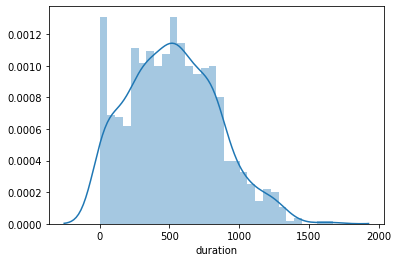

In [79]:
sns.distplot(ultra_person_calls['duration'],bins=30)

По гистограмме можно сделать вывод, что больше всего пользователи тарифа Ультра разговаривают около 1 мин

**Гистограмма распределия длительности звонков пользователей Смарт**

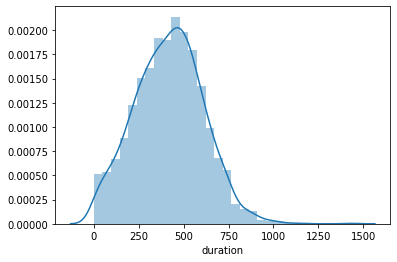

In [80]:
sns.distplot(smart_person_calls['duration'],bins=30)

По гистограмме можно сделать вывод, что больше всего пользователи тарифа Смарт разговаривают около 100 мин

**Гистограмма распределия количества отправленных смс пользователей Ультра**

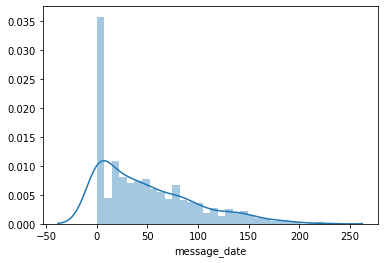

In [81]:
sns.distplot(ultra_person_calls['message_date'],bins=30)

По гистограмме можно сделать вывод, что больше всего пользователи тарифа Ультра отправляют около 10 смс

**Гистограмма распределия количества отправленных смс пользователей Смарт**

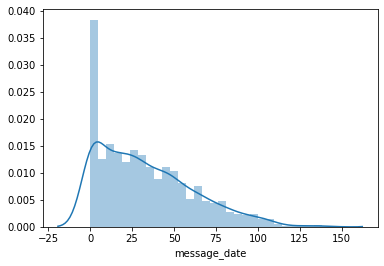

In [82]:
sns.distplot(smart_person_calls['message_date'],bins=30)

По гистограмме можно сделать вывод, что больше всего пользователи тарифа Смарт отправляют около 0-5 смс

**Гистограмма распределия количества потраченного интернета пользователей Ультра**

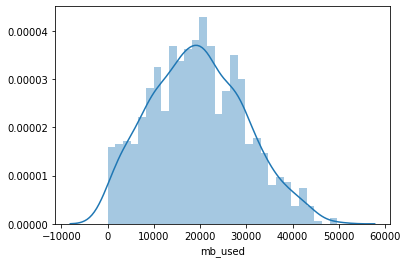

In [83]:
sns.distplot(ultra_person_calls['mb_used'],bins=30)

По гистограмме можно сделать вывод, что больше всего пользователи тарифа Ультра используют около 20 Гб.

**Гистограмма распределия количества потраченного интернета пользователей Смарт**

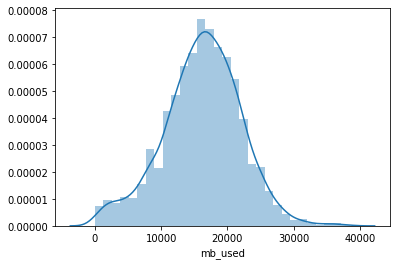

In [84]:
sns.distplot(smart_person_calls['mb_used'],bins=30)

По гистограмме можно сделать вывод, что больше всего пользователи тарифа Смарт используют около 25Гб

**Общая гистограмма распределения по потраченному интернету и сообщениям для тарифа Ультра**

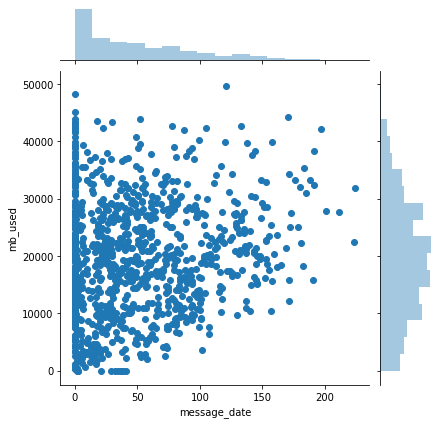

In [85]:
sns.jointplot(x='message_date', y='mb_used', data=ultra_person_calls, kind='scatter');

## Проверка гипотезы

**средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются**,
начнем с неё

Для проверки гипотез принимаем Нулевую гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается (равны). Проверка гипотезы альтернативной: среднее значение выручки Ультра меньше предполагаемого(значение Смарт)



In [86]:
ultra_all=group_all.query('tariff=="ultra"')
smart_all=group_all.query('tariff=="smart"')
ultra_all['money'].mean() # Среднее значение выручки пользователей Ультра


2069.543147208122

In [87]:
disp_ultra=np.var(ultra_all['money'])

In [88]:
print('99% значений попадают с интервал:+-',np.ceil(3*np.sqrt(disp_ultra)),'от среднего значения',np.ceil(ultra_all['money'].mean()))  

99% значений попадают с интервал:+- 1124.0 от среднего значения 2070.0


Считаю доверительный 95% интервал для Ультра

In [89]:
st.t.interval(0.95, len(ultra_all['money'])-1, loc=np.mean(ultra_all['money']), scale=st.sem(ultra_all['money']))

(2046.1159223086781, 2092.9703721075653)

Так выводится, потому что Каждая плата по тарифу Ультра равна 1950 или 0. Другого не дано

In [90]:
smart_all['money'].mean()

1286.563930013459

In [91]:
disp_smart=np.var(smart_all['money'])
print('99% значений попадают с интервал:+-',np.ceil(3*np.sqrt(disp_smart)),'от среднего значения',np.ceil(smart_all['money'].mean())) 

99% значений попадают с интервал:+- 2450.0 от среднего значения 1287.0


In [92]:
st.t.interval(0.95, len(smart_all['money'])-1, loc=np.mean(smart_all['money']), scale=st.sem(smart_all['money']))

(1252.648488862739, 1320.479371164179)

In [93]:
smart_all['money'].var() #Дисперсия выручки Смарт

666709.8034739556

In [94]:
ultra_all['money'].var() #Дисперсия выручки Ультра

140382.41302463785

Значения дисперсии сильно отличаются. Поэтому в функции st.ttest_ind буду использовать параметр equal_var=False

In [95]:
result=st.ttest_ind(smart_all['money'],ultra_all['money'],equal_var=False) 

Проверяем гипотезу о равенстве двух средних генеральных совокупностей

In [96]:
result.pvalue #выведите p-value из результата)

8.40789217310225e-253

In [97]:
alpha = 0.5
if (result.pvalue<alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилость отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


Для проверки гипотез принимаем Нулевую гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается (равны)

Нулевая гипотеза отвергнута. Значения средней выручки тарифа Ультра и тарифа Смарт различаются. 

Проверка гипотезы: **средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**. Нулевая гипотеза звучит так: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

In [98]:
moscow_all=group_all.query('city=="Москва"')

other_all=group_all.query('city!="Москва"')

alpha=0.05

moscow_all['money'].var()

565782.1126881489

In [99]:
moscow_all['money'].mean()

1544.504091653028

In [100]:
other_all['money'].var()

652186.4755625494

In [101]:
other_all['money'].mean()

1522.3046484825202

In [102]:
result=st.ttest_ind(moscow_all['money'],other_all['money'])

In [103]:
result.pvalue

0.5357407978453328

In [104]:
if (result.pvalue<alpha):
    print('Отвергаем гипотизу')
else:
    print('Гипотизу отвергнуть не удалось')

Гипотизу отвергнуть не удалось


Гипотезу отвернуть не удалось:). Средняя выручка в Москве отличается от средней выручки в регионах.

**Общий вывод:** самый популярный тариф оказался Смарт. Но самый прибылный тариф- Ультра. Доверительный интервал для тарифа ультра прибыли сосатвляет 1950 руб(других платежей по тарифу ультра нет), а доверительный интервал для тарифа Смарт 642-720 руб.

**Моё личный вывод:**
Немного запутался в проверке гипотез, но надеюсь что все правильно. Меня очень смутило то, что платежи по ультра только 1950